### Calibrate to NHIS data

by looking at smoking rates from 2016-2020

varying initiation and continuation params

In [15]:
from glob import glob
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
# target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/NHIS_Smoker_age/percent_smoker_by_year.xlsx").to_numpy()
# target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/percent_34_by_year.xlsx").to_numpy()
# target_arr = target_arr[:,1] / 100
# target_arr

target_arr = pd.read_excel("/Users/nick/Documents/Gillings_work/nhis_data/NHIS_state_age_Sep2022.xlsx").to_numpy()
target_arr = target_arr[2::5,3]
target_arr /= 100
target_arr

array([0.1513160774813408, 0.13729302965096327, 0.1343997623978405,
       0.1336313651838806, 0.12339752606221008], dtype=object)

In [23]:
x = []
y = []

for reduction in np.linspace(0.04,0.08,41):
    r = np.around(reduction, decimals=3)
    r_str = str(int(r * 1000))
    while len(r_str) < 3: r_str = "0" + r_str
    # print(r_str)
    save_dir = '../../nhis_calib_outputs/'

    dir = os.path.join(save_dir, r_str, "numpy_arrays", "*")
    files = sorted(glob(dir))
    x.append(r)
    to_avg = []

    for f in files:
        arr = np.load(f)
        arr = np.sum(arr, axis=(1,2))
        smoking_percents = np.sum(arr[:,2:4], axis=1) / np.sum(arr[:,0:5], axis=1)

        metric = np.linalg.norm(smoking_percents - target_arr)
        to_avg.append(metric)

    y.append(np.mean(to_avg))

In [24]:
m = np.argmin(y)
print(x[m])
print(y[m])

0.054
0.009489915998356042


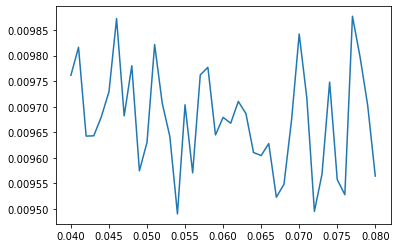

In [25]:
# data = zip(x,y)
# data = sorted(data, key=lambda x: x[0])
# x = [d[0] for d in data]
# y = [d[1] for d in data]
plt.plot(x,y)
plt.show()